In [1]:
import warnings 
warnings.filterwarnings(action='ignore')

import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import ParameterGrid 
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier as LGBMC 
from lightgbm.sklearn import LGBMRegressor
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import ADASYN 

import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm 


In [2]:
train_data=pd.read_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/train_wine.csv')
val_data=pd.read_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/val_wine.csv')
test_data=pd.read_csv('/dshome/WoongLab/heo/imbalance_wine/dataset/test_wine.csv')


In [3]:
train_data['quality'].value_counts()

0    655
1    544
Name: quality, dtype: int64

In [4]:
655*(1/15)

43.666666666666664

In [5]:
train_data_good=train_data[train_data['quality']==0]
train_data_bad=train_data[train_data['quality']==1]
train_data_bad_sample=train_data_bad.sample(43,replace=False,random_state=42)


In [6]:
train_data=pd.concat([train_data_good,train_data_bad_sample])

In [7]:
train_data_features=train_data.drop(['quality'],axis=1)
train_data_label=train_data['quality']

In [8]:
val_data_features=val_data.drop(['quality'],axis=1)
val_data_label=val_data['quality']

In [9]:
test_data_features=test_data.drop(['quality'],axis=1)
test_data_label=test_data['quality']

## **Baseline Model & Teacher Model -- LightgbmClassifier 구축**


In [10]:
lgbc_case1=LGBMC(n_estimators=200, max_depth=5, random_state=42)
lgbc_case2=LGBMC(n_estimators=500, max_depth=5, random_state=42)
lgbc_case3=LGBMC(n_estimators=1000, max_depth=5, random_state=42)
lgbc_case4=LGBMC(n_estimators=200, max_depth=7, random_state=42)
lgbc_case5=LGBMC(n_estimators=500, max_depth=7, random_state=42)
lgbc_case6=LGBMC(n_estimators=1000, max_depth=7, random_state=42)



In [11]:
lgbc_case1.fit(train_data_features,train_data_label)
lgbc_case2.fit(train_data_features,train_data_label)
lgbc_case3.fit(train_data_features,train_data_label)
lgbc_case4.fit(train_data_features,train_data_label)
lgbc_case5.fit(train_data_features,train_data_label)
lgbc_case6.fit(train_data_features,train_data_label)


LGBMClassifier(max_depth=7, n_estimators=1000, random_state=42)

In [12]:
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    # F1 스코어 추가
    f1=f1_score(y_test,pred,average='macro')
    AUC_score=roc_auc_score(y_test,pred)
    print('임계값: ', 0.5) 
    print('오차행렬')
    print(confusion) 
    #f1 score print 추가 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,AUC_score))

In [13]:
# learning_rate=0.01, max_depth=5, n_estimators=500, num_leaves=30,

pred_val_case1=lgbc_case1.predict(val_data_features)
pred_val_case2=lgbc_case2.predict(val_data_features)
pred_val_case3=lgbc_case3.predict(val_data_features)
pred_val_case4=lgbc_case4.predict(val_data_features)
pred_val_case5=lgbc_case5.predict(val_data_features)
pred_val_case6=lgbc_case6.predict(val_data_features)


In [14]:
get_clf_eval(val_data_label,pred_val_case1)

임계값:  0.5
오차행렬
[[98  2]
 [91  9]]
정확도: 0.5350, 정밀도: 0.8182, 재현율: 0.0900, F1:0.4202, AUC:0.5350


In [15]:
get_clf_eval(val_data_label,pred_val_case2)

임계값:  0.5
오차행렬
[[97  3]
 [95  5]]
정확도: 0.5100, 정밀도: 0.6250, 재현율: 0.0500, F1:0.3785, AUC:0.5100


In [16]:
get_clf_eval(val_data_label,pred_val_case3)

임계값:  0.5
오차행렬
[[98  2]
 [95  5]]
정확도: 0.5150, 정밀도: 0.7143, 재현율: 0.0500, F1:0.3812, AUC:0.5150


In [17]:
get_clf_eval(val_data_label,pred_val_case4)

임계값:  0.5
오차행렬
[[99  1]
 [93  7]]
정확도: 0.5300, 정밀도: 0.8750, 재현율: 0.0700, F1:0.4039, AUC:0.5300


In [18]:
get_clf_eval(val_data_label,pred_val_case5)

임계값:  0.5
오차행렬
[[99  1]
 [95  5]]
정확도: 0.5200, 정밀도: 0.8333, 재현율: 0.0500, F1:0.3839, AUC:0.5200


In [19]:
get_clf_eval(val_data_label,pred_val_case6)

임계값:  0.5
오차행렬
[[99  1]
 [95  5]]
정확도: 0.5200, 정밀도: 0.8333, 재현율: 0.0500, F1:0.3839, AUC:0.5200


#### Teacher Model parameter는 max_depth=7, n_estimators=200

#### Student Model parameter는 max_depth=5, n_estimators=200

In [20]:
lgbc_teacher=LGBMC(n_estimators=200, max_depth=7, random_state=42)

lgbreg_student=LGBMRegressor(n_estimators=200, max_depth=5, random_state=42)

lgbc_notdistilled_student=LGBMC(n_estimators=200, max_depth=5, random_state=42)


In [21]:
lgbc_teacher.fit(train_data_features,train_data_label)

LGBMClassifier(max_depth=7, n_estimators=200, random_state=42)

In [22]:
#  train_new_probab 데이터프레임에 저장하기

train_new_probab=pd.DataFrame()
train_new_probab['Prob1']=lgbc_teacher.predict_proba(train_data_features)[:,0]
train_new_probab['Prob2']=lgbc_teacher.predict_proba(train_data_features)[:,1]

In [23]:
train_new_probab['odds1']=train_new_probab['Prob1']/(1-train_new_probab['Prob1'])
train_new_probab['odds2']=train_new_probab['Prob2']/(1-train_new_probab['Prob2'])

In [24]:
import numpy as np 

train_new_probab['z1']=np.log(train_new_probab['odds1'])
train_new_probab['z2']=np.log(train_new_probab['odds2'])



In [25]:
#train_new_probab['temp_z1']=np.log(train_new_probab['odds1'])/100
#train_new_probab['temp_z2']=np.log(train_new_probab['odds2'])/100

In [26]:
#train_new_probab['max_z']=np.where(train_new_probab['temp_z1']>train_new_probab['temp_z2'],train_new_probab['temp_z1'],train_new_probab['temp_z2'])

In [27]:
#train_new_probab['exp_before_z']=train_new_probab['temp_z2']-train_new_probab['max_z']

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Student Model 평가할 함수 만들기

def get_reg_prob(y_test, probability):
  pred=np.where(probability > 0.5,1,0)
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred) 
  recall=recall_score(y_test,pred) 
  # F1 스코어 추가 
  f1=f1_score(y_test,pred, average='macro')
  Roc_score=roc_auc_score(y_test,pred)
  print('임계값: ', 0.5) 
  print('오차행렬')
  print(confusion) 
  # f1 score print 추가 
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4: .4f}'.format(accuracy,precision,recall,f1,Roc_score))

In [29]:

accuracy_list=[]
precision_list=[]
recall_list=[]
f1_list=[]
roc_score_list=[]
a=list(range(1,101,1))
for temperature in a:
    train_new_probab['temp_z1']=np.log(train_new_probab['odds1'])/temperature
    train_new_probab['temp_z2']=np.log(train_new_probab['odds2'])/temperature
    #train_new_probab['exp_before_z']=train_new_probab['temp_z2']-train_new_probab['max_z']
    train_new_probab['temp_prob']=np.exp(train_new_probab['temp_z2'])/(np.exp(train_new_probab['temp_z1'])+np.exp(train_new_probab['temp_z2']))
    train_new_probab['temp_prob_new']=np.where(train_new_probab['Prob2']>0.5,train_new_probab['Prob2'],train_new_probab['temp_prob'])
    lgbreg_student.fit(train_data_features,train_new_probab['temp_prob_new'])
    probab1=lgbreg_student.predict(val_data_features)
    pred=np.where(probab1 > 0.5,1,0)
    confusion=confusion_matrix(val_data_label, pred)
    accuracy=accuracy_score(val_data_label,pred)
    precision=precision_score(val_data_label, pred) 
    recall=recall_score(val_data_label, pred) 
    f1=f1_score(val_data_label, pred, average='macro')
    Roc_score=roc_auc_score(val_data_label, pred)
    print('temperature가 {}일 때의 validation set 평가 결과입니다.'.format(temperature))
    print('오차행렬')
    print(confusion)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_score_list.append(Roc_score)

temperature가 1일 때의 validation set 평가 결과입니다.
오차행렬
[[98  2]
 [95  5]]
temperature가 2일 때의 validation set 평가 결과입니다.
오차행렬
[[97  3]
 [95  5]]
temperature가 3일 때의 validation set 평가 결과입니다.
오차행렬
[[99  1]
 [94  6]]
temperature가 4일 때의 validation set 평가 결과입니다.
오차행렬
[[98  2]
 [94  6]]
temperature가 5일 때의 validation set 평가 결과입니다.
오차행렬
[[97  3]
 [93  7]]
temperature가 6일 때의 validation set 평가 결과입니다.
오차행렬
[[97  3]
 [89 11]]
temperature가 7일 때의 validation set 평가 결과입니다.
오차행렬
[[98  2]
 [87 13]]
temperature가 8일 때의 validation set 평가 결과입니다.
오차행렬
[[97  3]
 [88 12]]
temperature가 9일 때의 validation set 평가 결과입니다.
오차행렬
[[95  5]
 [91  9]]
temperature가 10일 때의 validation set 평가 결과입니다.
오차행렬
[[91  9]
 [85 15]]
temperature가 11일 때의 validation set 평가 결과입니다.
오차행렬
[[95  5]
 [83 17]]
temperature가 12일 때의 validation set 평가 결과입니다.
오차행렬
[[94  6]
 [83 17]]
temperature가 13일 때의 validation set 평가 결과입니다.
오차행렬
[[94  6]
 [83 17]]
temperature가 14일 때의 validation set 평가 결과입니다.
오차행렬
[[94  6]
 [80 20]]
temperature가 15일 때의 validation set 평가 결과입니다

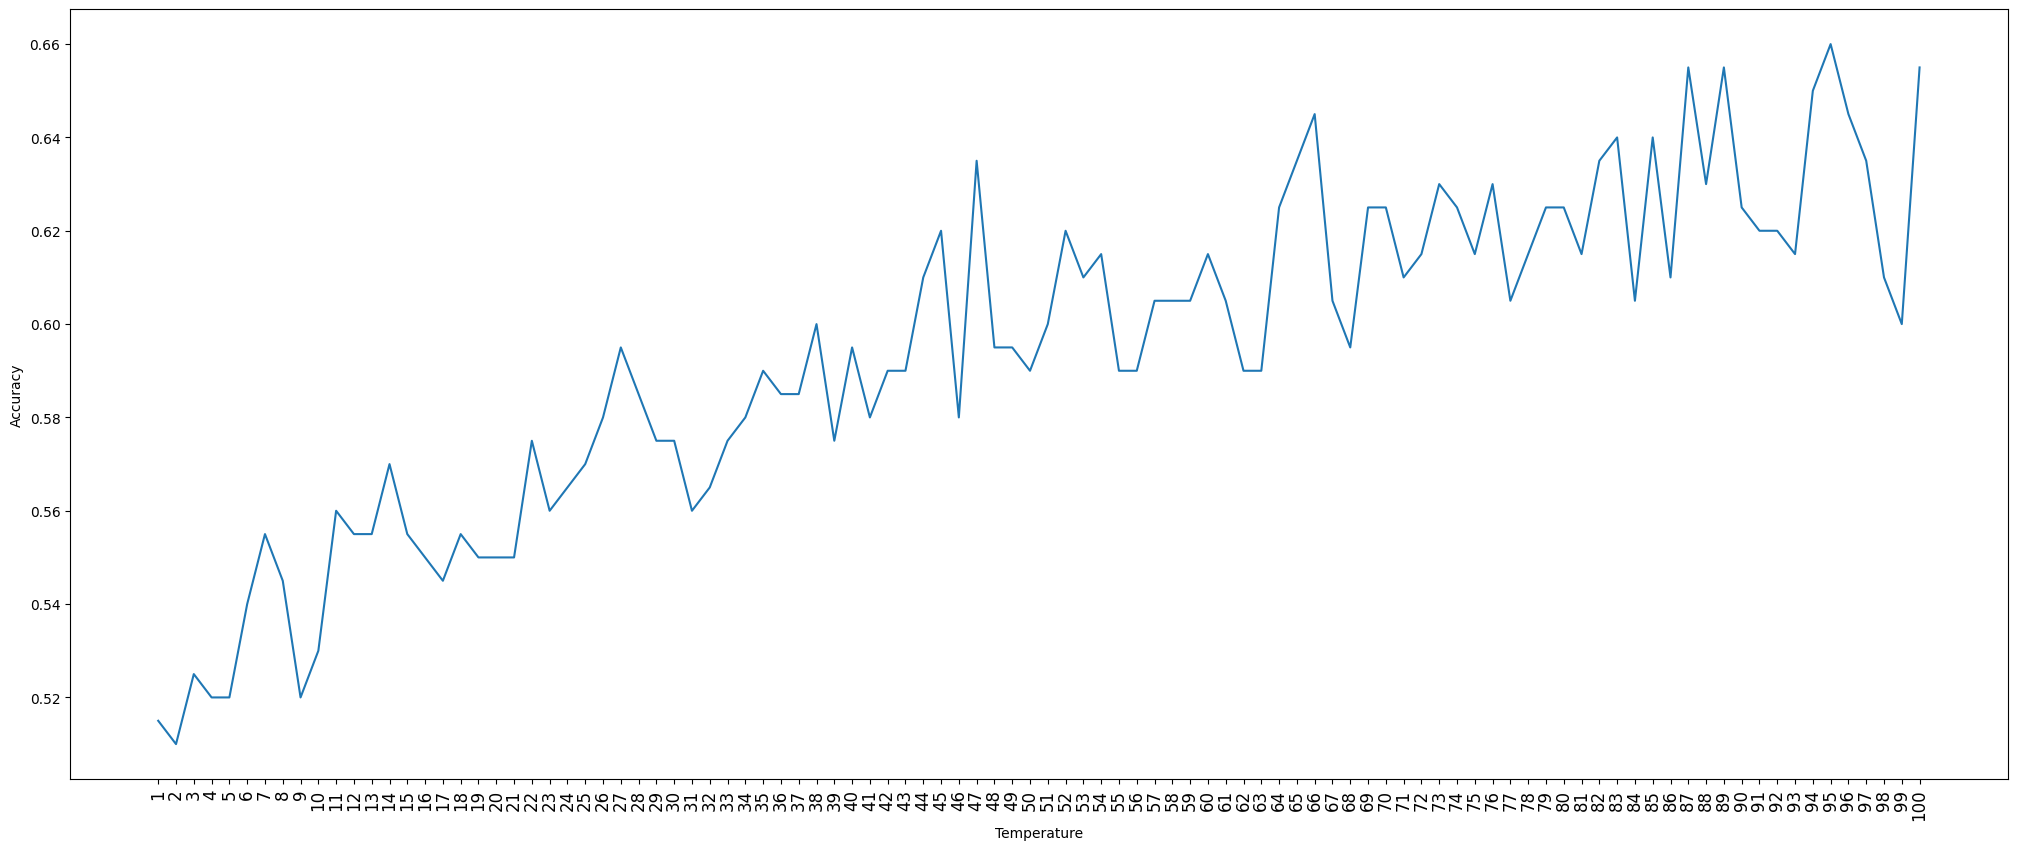

In [30]:
import matplotlib.pyplot as plt 
a=list(range(1,101,1))
plt.figure(figsize=(25,10))
plt.plot(a,accuracy_list)
plt.xlabel('Temperature') 
plt.ylabel('Accuracy')
plt.xticks(range(1,101,1),size=12,rotation=90)
plt.show()

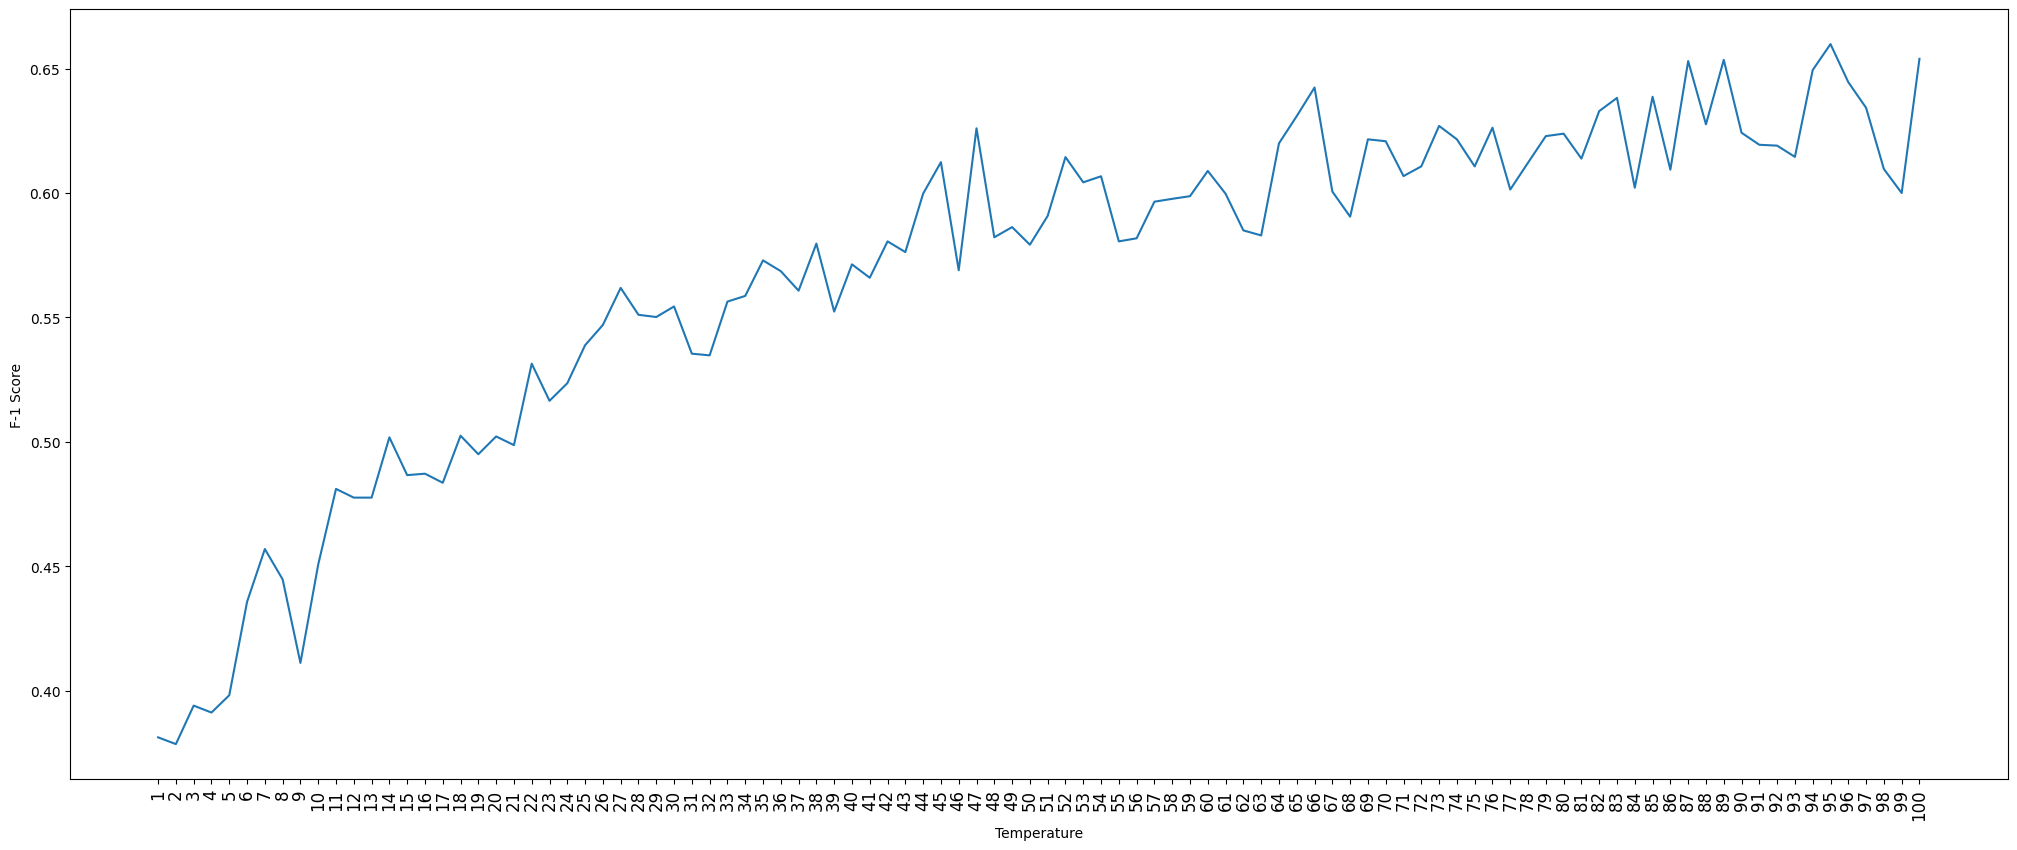

In [31]:
import matplotlib.pyplot as plt 
a=list(range(1,101,1))
plt.figure(figsize=(25,10))
plt.plot(a,f1_list)
plt.xlabel('Temperature') 
plt.ylabel('F-1 Score')
plt.xticks(range(1,101,1),size=12,rotation=90)
plt.show()

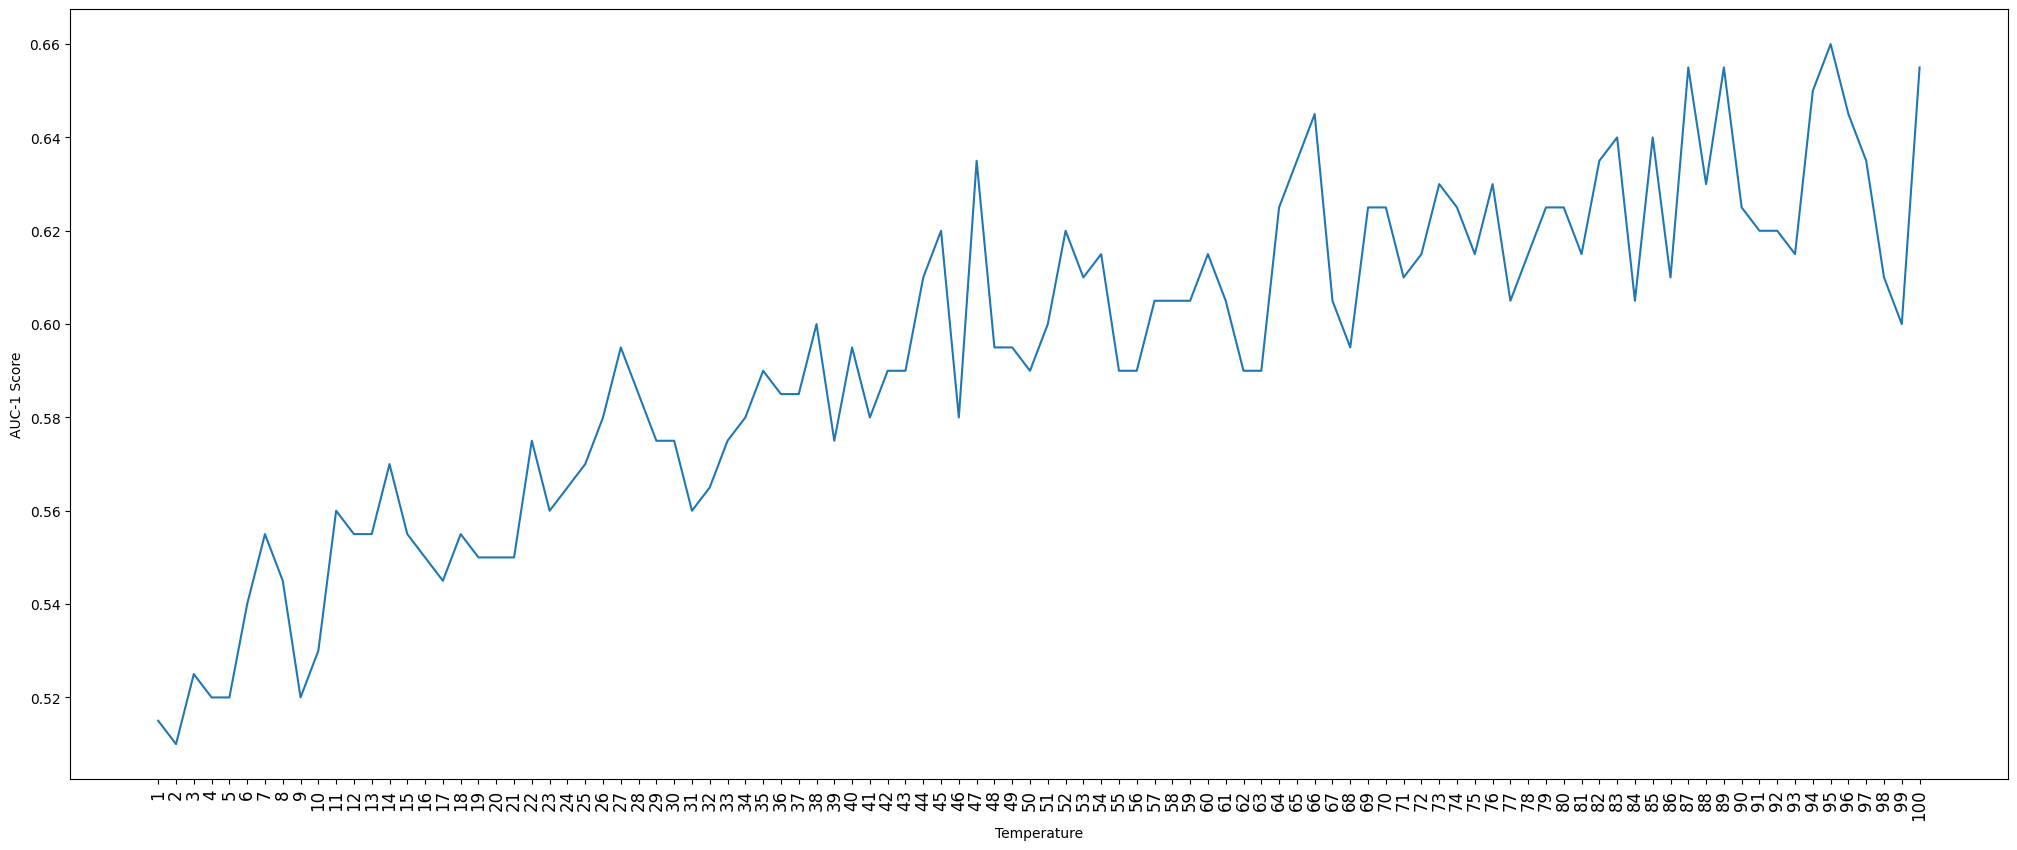

In [32]:
import matplotlib.pyplot as plt 
a=list(range(1,101,1))
plt.figure(figsize=(25,10))
plt.plot(a,roc_score_list)
plt.xlabel('Temperature') 
plt.ylabel('AUC-1 Score')
plt.xticks(range(1,101,1),size=12,rotation=90)
plt.show()

In [33]:
temperature=95
train_new_probab['temp_z1']=np.log(train_new_probab['odds1'])/temperature
train_new_probab['temp_z2']=np.log(train_new_probab['odds2'])/temperature
# train_new_probab['max_z']=np.where(train_new_probab['temp_z1']>train_new_probab['temp_z2'],train_new_probab['temp_z1'],train_new_probab['temp_z2'])
# train_new_probab['exp_before_z']=train_new_probab['temp_z2']-train_new_probab['max_z']
train_new_probab['temp_prob']=np.exp(train_new_probab['temp_z2'])/(np.exp(train_new_probab['temp_z1'])+np.exp(train_new_probab['temp_z2']))
train_new_probab['temp_prob_new']=np.where(train_new_probab['Prob2']>0.5,train_new_probab['Prob2'],train_new_probab['temp_prob'])

In [34]:
lgbreg_student.fit(train_data_features,train_new_probab['temp_prob_new'])

LGBMRegressor(max_depth=5, n_estimators=200, random_state=42)

In [35]:
probab1=lgbreg_student.predict(test_data_features)

In [36]:
get_reg_prob(test_data_label, probab1)

임계값:  0.5
오차행렬
[[74 26]
 [39 61]]
정확도: 0.6750, 정밀도: 0.7011, 재현율: 0.6100, F1:0.6736, AUC: 0.6750


## not distilled test data evaluation

In [37]:
lgbc_notdistilled_student.fit(train_data_features,train_data_label)

LGBMClassifier(max_depth=5, n_estimators=200, random_state=42)

In [38]:
pred2=lgbc_notdistilled_student.predict(test_data_features)

In [39]:
get_clf_eval(test_data_label,pred2)

임계값:  0.5
오차행렬
[[100   0]
 [ 94   6]]
정확도: 0.5300, 정밀도: 1.0000, 재현율: 0.0600, F1:0.3967, AUC:0.5300
